In [4]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the Census dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### EDA

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above data we determine mean,standard deviation, minimum,maximum value of each column It help us further in data cleaning

### Studying the distribution of dependent and independent variables

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

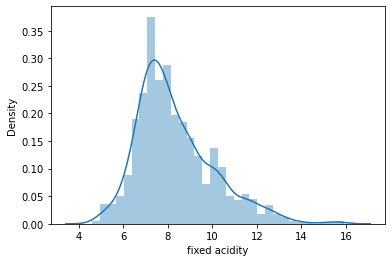

In [10]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

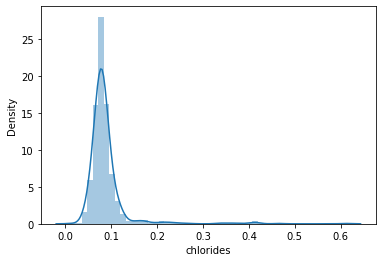

In [11]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

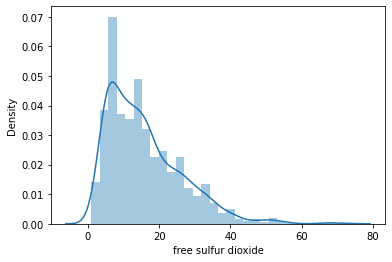

In [12]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

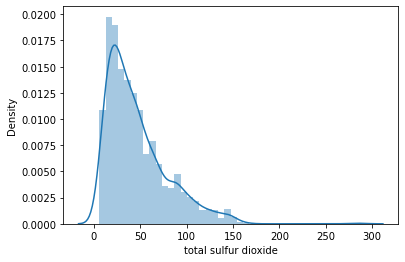

In [13]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

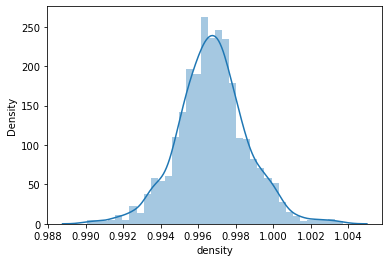

In [14]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

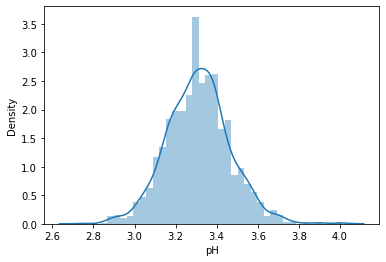

In [15]:
sns.distplot(df['pH'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

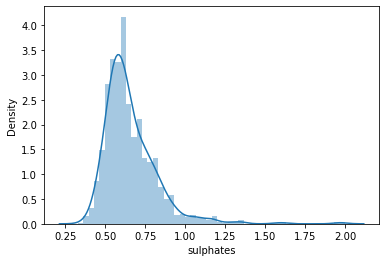

In [16]:
sns.distplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

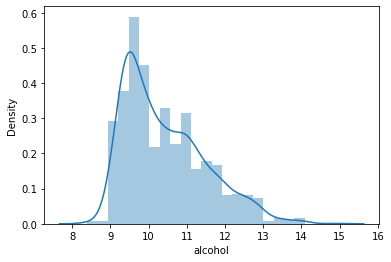

In [17]:
sns.distplot(df['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='Density'>

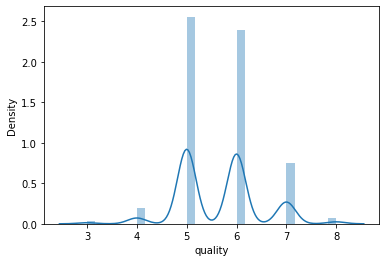

In [18]:
sns.distplot(df['quality'])

#From the plot below it is clear that the popularity of medium quality wine 5 and 6 is high 

and other data seems to be out of normally distribution so we have to do data reprocessing

##set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [19]:
#classifying the quality of wine as 1 or 0
df['quality']=[1 if i>=7 else 0 for i in df['quality']]

In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


### Scatterplot

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

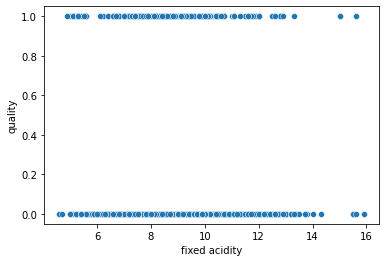

In [21]:
sns.scatterplot(x='fixed acidity',y='quality',data=df)

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

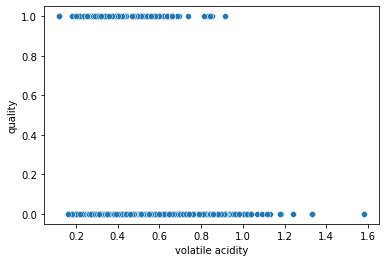

In [22]:
sns.scatterplot(x='volatile acidity',y='quality',data=df)

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

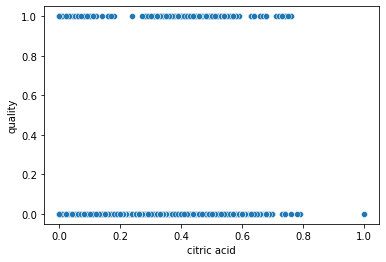

In [23]:
sns.scatterplot(x='citric acid',y='quality',data=df)

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

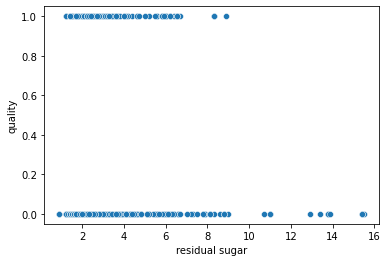

In [24]:
sns.scatterplot(x='residual sugar',y='quality',data=df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

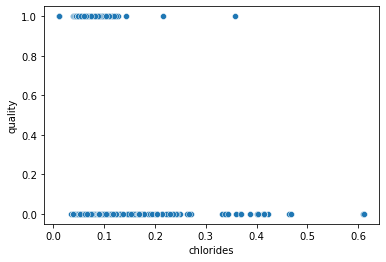

In [25]:
sns.scatterplot(x='chlorides',y='quality',data=df)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

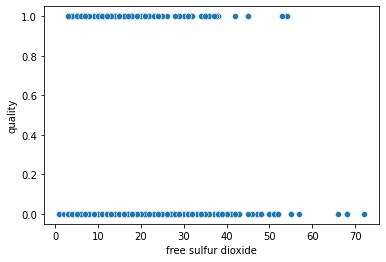

In [26]:
sns.scatterplot(x='free sulfur dioxide',y='quality',data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

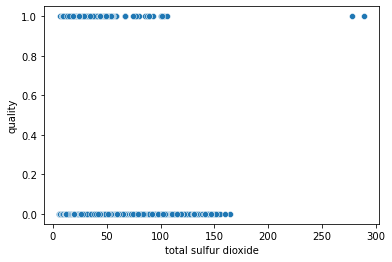

In [27]:
sns.scatterplot(x='total sulfur dioxide',y='quality',data=df)

<AxesSubplot:xlabel='density', ylabel='quality'>

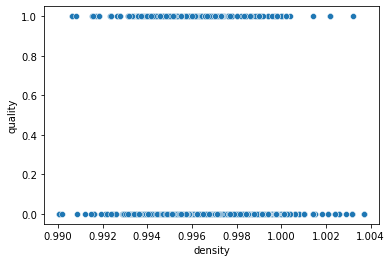

In [28]:
sns.scatterplot(x='density',y='quality',data=df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

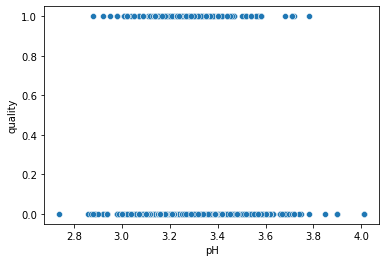

In [29]:
sns.scatterplot(x='pH',y='quality',data=df)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

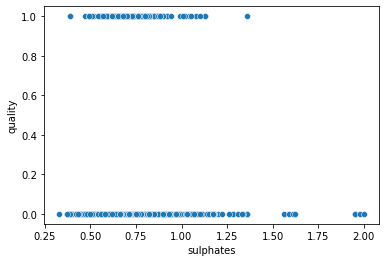

In [30]:
sns.scatterplot(x='sulphates',y='quality',data=df)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

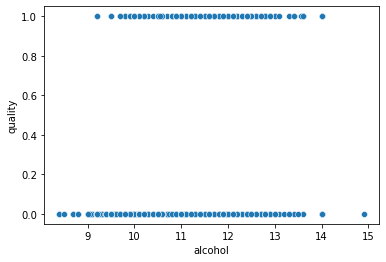

In [31]:
sns.scatterplot(x='alcohol',y='quality',data=df)

### Correlation checking

<AxesSubplot:>

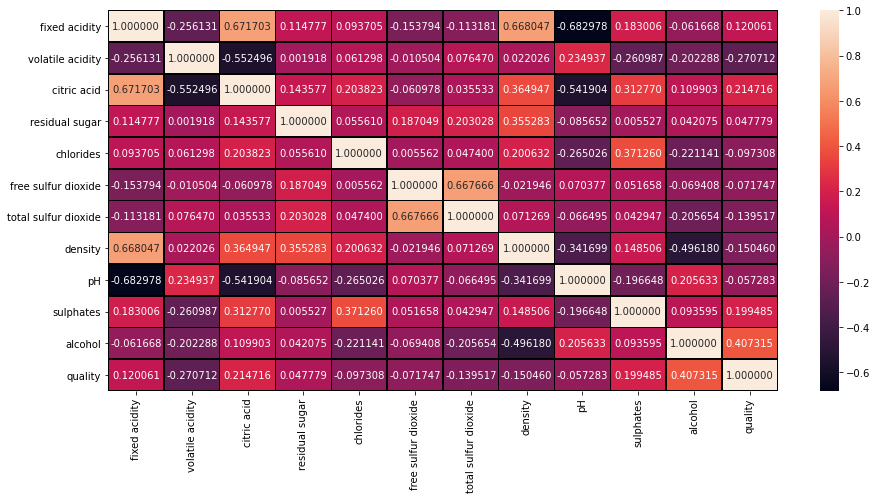

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='2f')#annot no rep in ht map,2f is twon decimal point

### Describing Dataset

In [33]:
df.describe()#skewness present if there is no diff between 25%,50%,75%

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


From above plotting we determine mean,standard deviation, minimum,maximum value of each column It help us further in data cleaning

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the above code , we know about the dtypes of column and memory used by dataframe

### Outliars hecking

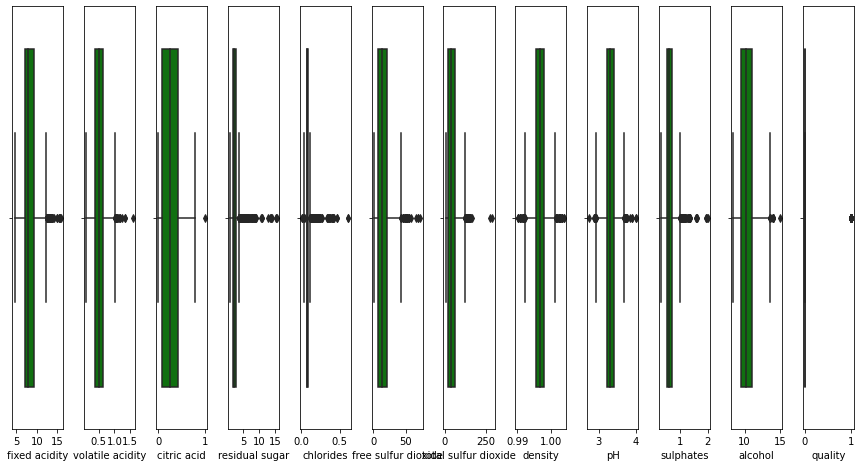

In [37]:
colist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(colist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[colist[i]],color='green',orient='h')#h horizontal
    plt.tight_layout()


### Skewness

In [35]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [36]:
#From the above code , we know about the dtypes of column and memory used by dataframe

### Data Preprocessing¶

#### Data Cleaning:

In [38]:
df.corr()['quality']

fixed acidity           0.120061
volatile acidity       -0.270712
citric acid             0.214716
residual sugar          0.047779
chlorides              -0.097308
free sulfur dioxide    -0.071747
total sulfur dioxide   -0.139517
density                -0.150460
pH                     -0.057283
sulphates               0.199485
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

In [39]:
df=df.drop(['chlorides','residual sugar','free sulfur dioxide','pH'],axis=1)
df

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,0
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8,0
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8,0
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8,0
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5,0
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2,0
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0,0
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2,0


### Removing Outliars

##### Z-score Techniques

In [40]:
import scipy
from scipy import stats
from scipy.stats import zscore
import numpy as np

In [41]:
z=np.abs(zscore(df))#abs is absolute futn toget every value as positive value

z.shape

(1599, 8)

In [42]:
threshold=3#this is fixed,rule of thumb
#index number
print(np.where(z>3))#np.where index loc

(array([  13,   15,   17,   38,   43,   81,   86,   88,   91,   92,  106,
        109,  120,  126,  127,  142,  144,  151,  151,  169,  199,  226,
        243,  244,  258,  339,  340,  347,  354,  374,  381,  391,  442,
        442,  467,  480,  515,  544,  554,  554,  555,  555,  557,  557,
        588,  591,  608,  614,  636,  639,  649,  651,  652,  652,  672,
        672,  684,  690,  692,  723,  724,  795,  821,  836,  837,  889,
       1017, 1018, 1051, 1079, 1081, 1114, 1244, 1269, 1269, 1270, 1270,
       1288, 1289, 1299, 1312, 1319, 1367, 1370, 1372, 1434, 1435, 1474,
       1476, 1493, 1496], dtype=int64), array([5, 3, 5, 1, 5, 5, 5, 5, 5, 5, 5, 3, 1, 1, 1, 6, 6, 2, 5, 5, 1, 5,
       0, 0, 5, 5, 5, 0, 3, 0, 0, 0, 0, 4, 6, 4, 3, 0, 0, 4, 0, 4, 0, 4,
       6, 3, 4, 5, 3, 5, 3, 3, 0, 6, 1, 3, 3, 1, 5, 5, 1, 5, 6, 4, 4, 4,
       4, 4, 5, 3, 3, 4, 3, 4, 6, 4, 6, 5, 5, 1, 1, 5, 5, 5, 5, 4, 4, 4,
       4, 3, 3], dtype=int64))


In [43]:
len(np.where(z>3)[0])

91

In [44]:
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("Total_dropped_rows",df.shape[0]-df_new.shape[0])

Old Dataframe (1599, 8)
New Dataframe (1517, 8)
Total_dropped_rows 82


### Percentage Data loss¶

In [45]:
loss_percent=(1599-1517)/1599*100
print(loss_percent,'%')

5.128205128205128 %


If loss of data is not affordable by the client than fixing the outliar with the help IQR method Ideally 10 percent data loss is ideal


Checking whether how much outliar are still there.If the outliar there it help in testing the model or not


### Model without outliars is df and model with desired outliars is df_new1:¶

#### Dividing data in features and vectors

In [46]:
#independent Column
x=df_new.iloc[:,:-1]
#target
y=df_new.iloc[:,-1]

### Transforming the data to remove skewness

In [47]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')#yeo-johnson method 
x

array([[-0.44578828,  1.04179777, -1.5213391 , ...,  0.6230163 ,
        -0.58845621, -1.09993717],
       [-0.15619498,  1.90966653, -1.5213391 , ...,  0.04951725,
         0.44041492, -0.51573396],
       [-0.15619498,  1.34391338, -1.24153339, ...,  0.16454485,
         0.21294544, -0.51573396],
       ...,
       [-1.39126478, -0.01498594, -0.6619572 , ..., -0.56287957,
         0.90827802,  0.74491477],
       [-1.80332106,  0.75237124, -0.72322636, ..., -0.71960986,
         0.65104521, -0.0244806 ],
       [-1.69625064, -1.33330852,  1.0673519 , ..., -0.70798984,
         0.29073998,  0.74491477]])

In [48]:
#After powetransformation check that skewness is removed or not
pd.DataFrame(x).skew()
#here all the data is defined in a range, there is no skewness

0    0.010734
1    0.004258
2    0.019799
3   -0.008285
4   -0.000640
5    0.023849
6    0.113993
dtype: float64

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x
#standard scalar is used to convert the value in one range
#it is used where min max has is having more difference

array([[-0.44578828,  1.04179777, -1.5213391 , ...,  0.6230163 ,
        -0.58845621, -1.09993717],
       [-0.15619498,  1.90966653, -1.5213391 , ...,  0.04951725,
         0.44041492, -0.51573396],
       [-0.15619498,  1.34391338, -1.24153339, ...,  0.16454485,
         0.21294544, -0.51573396],
       ...,
       [-1.39126478, -0.01498594, -0.6619572 , ..., -0.56287957,
         0.90827802,  0.74491477],
       [-1.80332106,  0.75237124, -0.72322636, ..., -0.71960986,
         0.65104521, -0.0244806 ],
       [-1.69625064, -1.33330852,  1.0673519 , ..., -0.70798984,
         0.29073998,  0.74491477]])

Since Outcome has only two variable,so we are using binary classification model¶

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

### Splitting the DataFrame

In [51]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model perform very well")
        print("At random state-",i)
        print("Training accuracy score is-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy score is-",accuracy_score(y_test,pred_test)*100)
        
    

At random state 41 The model perform very well
At random state- 41
Training accuracy score is- 88.45836768342951
Testing accuracy score is- 88.48684210526315
At random state 46 The model perform very well
At random state- 46
Training accuracy score is- 88.54080791426216
Testing accuracy score is- 88.48684210526315
At random state 73 The model perform very well
At random state- 73
Training accuracy score is- 88.45836768342951
Testing accuracy score is- 88.48684210526315
At random state 90 The model perform very well
At random state- 90
Training accuracy score is- 88.45836768342951
Testing accuracy score is- 88.48684210526315
At random state 101 The model perform very well
At random state- 101
Training accuracy score is- 88.45836768342951
Testing accuracy score is- 88.48684210526315
At random state 112 The model perform very well
At random state- 112
Training accuracy score is- 88.45836768342951
Testing accuracy score is- 88.48684210526315
At random state 125 The model perform very well


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=996)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       262
           1       0.15      0.10      0.12        42

    accuracy                           0.80       304
   macro avg       0.51      0.51      0.50       304
weighted avg       0.77      0.80      0.78       304



### Cross validation score for logistic regression

In [ ]:
#to check that model is overfit or not

In [54]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100)
    print("Accuracy score is:-",lsc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 85.69340299866856
Accuracy score is:- 85.69340299866856


At cv:- 3
Cross validation score is:- 88.33235497462789
Accuracy score is:- 88.33235497462789


At cv:- 4
Cross validation score is:- 87.2118455770032
Accuracy score is:- 87.2118455770032


At cv:- 5
Cross validation score is:- 87.27831335765156
Accuracy score is:- 87.27831335765156


At cv:- 6
Cross validation score is:- 87.93603739255914
Accuracy score is:- 87.93603739255914


At cv:- 7
Cross validation score is:- 87.60850218223489
Accuracy score is:- 87.60850218223489


At cv:- 8
Cross validation score is:- 87.47528543581176
Accuracy score is:- 87.47528543581176


At cv:- 9
Cross validation score is:- 88.13202467048622
Accuracy score is:- 88.13202467048622




In [ ]:
Since cross validation score and accuracy score are almost same. we are heading with a good approach.

In [55]:
lsscore_selected=cross_val_score(lr,x,y,cv=9).mean()#where same cv score and accuracy score same
print("The cv score is",lsscore_selected,"\n The accuracy score is:-",lss)

The cv score is 0.8813202467048622 
 The accuracy score is:- 0.8848684210526315


#### The Model with The outliars:

#### AUC ROC Curve

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_pred_prob=lr.predict_proba(x_test )[:,1]
y_pred_prob

fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

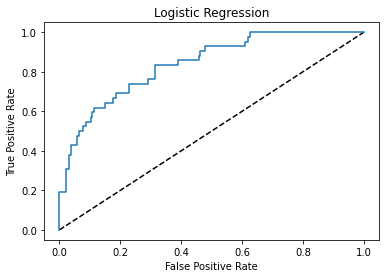

In [62]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [64]:
auc_score=roc_auc_score(y_test,y_pred_prob)
auc_score

0.8383315158124318

### Esamble Technique:-Removing outliars

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=996)

In [87]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

 #creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
 

# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.8881578947368421


Since the model without outliars is performing well for randomforest!we ill select that dataframe¶

In [ ]:
import pickle
filename="winequality-red.pkl"
pickle.dump(lr,open(filename,'wb'))

### Conclusion

In [88]:
import numpy as np
a=np.array(y_test)
predicted=np.array(clf.predict(x_test))
df_com=pd.DataFrame({"Original":a,"predicted":predicted},index=range(len(a)))
df_com

,Original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
299,0,0
300,0,0
301,0,0
302,0,0
